In [2]:
import numpy as np
from itertools import permutations

In [3]:
problem_set = [
    [["0", "2"], ["1", "0"], ["1", "2"], ["1", "3"], ["2", "0"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "2"], ["2", "2"], ["3", "0"], ["3", "3"]],
    [["0", "0"], ["1", "1"], ["1", "3"], ["2", "0"], ["3", "2"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "1"], ["1", "3"], ["3", "2"], ["3", "3"]],
    [["0", "2"], ["1", "0"], ["1", "3"], ["2", "0"], ["3", "2"], ["3", "3"]],
    [["1", "1"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "1"], ["3", "3"]],
    [["0", "2"], ["0", "3"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "3"]],
    [["0", "0"], ["0", "3"], ["1", "2"], ["2", "2"], ["2", "3"], ["3", "0"]],
    [["0", "3"], ["1", "1"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "3"], ["2", "1"], ["2", "3"], ["3", "0"]],
    [["0", "1"], ["0", "3"], ["1", "2"], ["1", "3"], ["2", "0"], ["3", "2"]],
    [["0", "0"], ["1", "3"], ["2", "0"], ["2", "1"], ["2", "3"], ["3", "1"]],
    [["0", "1"], ["0", "2"], ["1", "0"], ["1", "2"], ["2", "2"], ["2", "3"]],
    [["0", "3"], ["1", "0"], ["1", "3"], ["2", "1"], ["2", "2"], ["3", "0"]],
    [["0", "2"], ["0", "3"], ["1", "2"], ["2", "3"], ["3", "0"], ["3", "1"]],
    [["0", "1"], ["1", "0"], ["1", "2"], ["2", "2"], ["3", "0"], ["3", "1"]],
]


In [4]:
score_array = [10, 69, 223, 487, 1015]

def print_and_split(cluster_dict, bit_string="", branch_order=[3,2,1,0]):

    depth = len(bit_string)

    # Check to see if there is only one value in the dictionary.values()
    if len(set(cluster_dict.values())) == 1:
        unique_value = set(cluster_dict.values()).pop()
        # print(f"We have a leaf with value {unique_value} with bit_string {bit_string}")
        return score_array[len(bit_string)]
    
    zero_dict = {}
    one_dict = {}
    current_bit = branch_order[depth]
    
    for k,v in cluster_dict.items():
        if k[current_bit] == "0":
            zero_dict[k] = v
        else:
            one_dict[k] = v

    score1 = print_and_split(zero_dict, bit_string + "0", branch_order)
    score2 = print_and_split(one_dict, bit_string + "1", branch_order)

    return score1 + score2

perm = [3,1,0,2]
score = print_and_split(row_to_dict(test), branch_order=perm)
print(f"The score is {score} with permutation {perm}; worst score is {score_array[-1]*16}")

NameError: name 'row_to_dict' is not defined

In [ ]:
ps = np.array(problem_set, int)
cluster_horz = ps.T[0]
cluster_vert = ps.T[1]

for i, row in enumerate(cluster_horz):
    best_score = 999999
    best_perm = None

    for p in permutations([0,1,2,3]):
        score = print_and_split(row_to_dict(row), branch_order=p)
        if score < best_score:
            best_score = score
            best_perm = p

    score = print_and_split(row_to_dict(row), branch_order=best_perm)
    print(f"The best score is for horizontal row {i} is {score} with permutation {best_perm}; worst score is 16240")

for i, row in enumerate(cluster_vert):
    best_score = 999999
    best_perm = None

    for p in permutations([0,1,2,3]):
        score = print_and_split(row_to_dict(row), branch_order=p)
        if score < best_score:
            best_score = score
            best_perm = p

    score = print_and_split(row_to_dict(row), branch_order=best_perm)
    print(f"The best score is for vertical row {i} is {score} with permutation {best_perm}; worst score is {score_array[-1]*16}")

In [ ]:

from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller


def calculate_score(qc):
    pass_ = Unroller(["u3", "cx"])
    pm = PassManager(pass_)
    new_circuit = pm.run(qc)
    count_dict = new_circuit.count_ops()

    return count_dict.get("u3", 0) + count_dict.get("cx",0) * 10, count_dict

qc = QuantumCircuit(6)
qc.mcx([0,1,2,3,4],5)

calculate_score(qc)


In [7]:
def row_to_dict(row):

    row_dict = {}
    for i, item in enumerate(row):

        if len(row) == 2:
            bin_str = f"{i:01b}"
        if len(row) == 4:
            bin_str = f"{i:02b}"
        if len(row) == 8:
            bin_str = f"{i:02b}"
        if len(row) == 16:
            bin_str = f"{i:04b}"

        row_dict[bin_str] = item

    return row_dict    

def get_qram_logic_score(cluster_dict, bit_string="", branch_order=[3,2,1,0]):

    score_array = [10, 69, 223, 487, 1015]

    # Check to see if there is only one value in the dictionary.values()
    if len(set(cluster_dict.values())) == 1:
        unique_value = set(cluster_dict.values()).pop()
        # print(f"We have a leaf with value {unique_value} with bit_string {bit_string}")
        return score_array[len(bit_string)]
    
    zero_dict = {}
    one_dict = {}
    current_bit = branch_order[0]
    
    for k,v in cluster_dict.items():
        if k[current_bit] == "0":
            zero_dict[k] = v
        else:
            one_dict[k] = v

    score1 = print_and_split(zero_dict, bit_string + "0", branch_order[1:])
    score2 = print_and_split(one_dict, bit_string + "1", branch_order[1:])

    return score1 + score2

def get_lowest_score_branching_order(row_of_positions):
    best_score = 9999999
    best_perm = None

    for p in permutations([0,1,2,3]):
        score = get_qram_logic_score(row_to_dict(row_of_positions), branch_order=p)
        if score < best_score:
            best_score = score
            best_perm = p

        return best_perm, best_score

ps = np.array(problem_set, int)
cluster_horz = ps.T[0]
cluster_vert = ps.T[1]

perm, score = get_lowest_score_branching_order(cluster_horz[0])







IndexError: tuple index out of range

In [ ]:
qc = QuantumCircuit(qr_shots, qr_address, qr_cluster, qr_extra)

    for p, puzzle in enumerate(prob_set):  # for each puzzle

        puzzle = np.array(puzzle, int)  # convert to int
        # Mark the puzzle's address (p):
        qc = mark_address(qc, qr_address, p)

        for c, (h, v) in enumerate(puzzle):  # for each position pair in puzzle
            # Control cluster c with address and the puzzle's horizontal number
            qc.mct(
                qr_address[:] + [qr_shots[h]], qr_cluster[c], qr_extra, mode="v-chain",
            )
            qc.mct(
                qr_address[:] + [qr_shots[v + 4]],
                qr_cluster[c],
                qr_extra,
                mode="v-chain",
            )

        # Unmark the puzzles's address:
        qc = mark_address(qc, qr_address, p)

    # Convert to gate and return
    if return_gate:

        game_logic = qc.to_gate()
        game_logic.name = "Game Logic"
        return game_logic
    else:
        return qc

Circuit executed in 50.6569 seconds
(71703, OrderedDict([('u3', 12083), ('cx', 5962), ('measure', 8), ('barrier', 2)]))


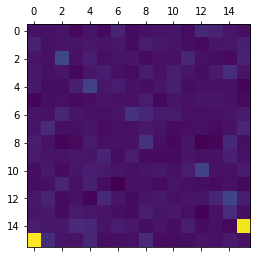

In [36]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, execute
from week3_func import game_logic_oracle, diffusion, game_logic_oracle_opt
import time
import numpy as np
import matplotlib.pyplot as plt

problem_set = [
    [["0", "2"], ["1", "0"], ["1", "2"], ["1", "3"], ["2", "0"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "2"], ["2", "2"], ["3", "0"], ["3", "3"]],
    [["0", "0"], ["1", "1"], ["1", "3"], ["2", "0"], ["3", "2"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "1"], ["1", "3"], ["3", "2"], ["3", "3"]],
    [["0", "2"], ["1", "0"], ["1", "3"], ["2", "0"], ["3", "2"], ["3", "3"]],
    [["1", "1"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "1"], ["3", "3"]],
    [["0", "2"], ["0", "3"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "3"]],
    [["0", "0"], ["0", "3"], ["1", "2"], ["2", "2"], ["2", "3"], ["3", "0"]],
    [["0", "3"], ["1", "1"], ["1", "2"], ["2", "0"], ["2", "1"], ["3", "3"]],
    [["0", "0"], ["0", "1"], ["1", "3"], ["2", "1"], ["2", "3"], ["3", "0"]],
    [["0", "1"], ["0", "3"], ["1", "2"], ["1", "3"], ["2", "0"], ["3", "2"]],
    [["0", "0"], ["1", "3"], ["2", "0"], ["2", "1"], ["2", "3"], ["3", "1"]],
    [["0", "1"], ["0", "2"], ["1", "0"], ["1", "2"], ["2", "2"], ["2", "3"]],
    [["0", "3"], ["1", "0"], ["1", "3"], ["2", "1"], ["2", "2"], ["3", "0"]],
    [["0", "2"], ["0", "3"], ["1", "2"], ["2", "3"], ["3", "0"], ["3", "1"]],
    [["0", "1"], ["1", "0"], ["1", "2"], ["2", "2"], ["3", "0"], ["3", "1"]],
]

problem_set = problem_set

count_shots = True

num_problems = len(problem_set)
address_qubits = int(np.sqrt(num_problems))
counting_qubits = 4

# 4 + 4 (shot options) + 6 (clusters) + 4 (address) + 3 (counting) + 1 (ancilla) = 22, 6 extra!
qr_shots = QuantumRegister(8, name="shots")
qr_cluster = QuantumRegister(6, name="clusters")
qr_address = QuantumRegister(address_qubits, name="address")
qr_counter = QuantumRegister(counting_qubits, name="counting")
qr_ancilla = QuantumRegister(2, name="ancilla")
num_extra = 28 - len(
    qr_shots[:] + qr_cluster[:] + qr_address[:] + qr_counter[:] + qr_ancilla[:]
)

qr_extra = QuantumRegister(num_extra, name="extra")

cr_shots = ClassicalRegister(len(qr_shots))
cr_address = ClassicalRegister(address_qubits)

if count_shots:
    qc = QuantumCircuit(
        qr_shots,
        qr_address,
        qr_cluster,
        qr_counter,
        qr_ancilla,
        qr_extra,
        cr_shots,
    )
else:
    qc = QuantumCircuit(
        qr_shots,
        qr_address,
        qr_cluster,
        qr_counter,
        qr_ancilla,
        qr_extra,
        cr_address,
    )

# Prepare ancilla
qc.x(qr_ancilla)
qc.h(qr_ancilla)

# Put solution into superposition
qc.h(qr_shots[:] + qr_address[:])

qc.barrier()

# Load game gate
game_qubits = qr_shots[:] + qr_address[:] + qr_cluster[:] + qr_extra[:]

game_gate = game_logic_oracle_opt(
    qr_shots=qr_shots,
    qr_address=qr_address,
    qr_cluster=qr_cluster,
    qr_extra=qr_extra,
    prob_set=problem_set,
    return_gate = False

)

# Append game gate
qc.append(game_gate, game_qubits)

# Check solution
try:
    qc.mct(qr_cluster, qr_ancilla[0], qr_extra, mode="v-chain")
except ValueError:
    qc.mct(qr_cluster, qr_ancilla[0], qr_extra, mode="recursion")

# Uncompute game gate
qc.append(game_gate.inverse(), game_qubits)

# Diffusion circuit
qc = diffusion(qc, qr_shots, qr_extra)

qc.measure(qr_shots, cr_shots)

######

backend = Aer.get_backend("qasm_simulator")
tic = time.perf_counter()
job = execute(
    qc,
    backend=backend,
    shots=10000,
    backend_options={"fusion_enable": True},
)

result = job.result()
count = result.get_counts()

#for k, v in count.items():
#    print(k, v)

toc = time.perf_counter()

print(f"Circuit executed in {toc - tic:0.4f} seconds")
print(calculate_score(qc))

plt.matshow(np.array(list(count.values())).reshape([16,16]))

(112995, OrderedDict([('u3', 17975), ('cx', 9502), ('measure', 8), ('barrier', 2)]))


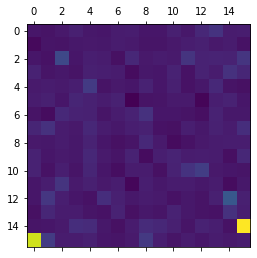

In [34]:
print(calculate_score(qc))
plt.matshow(np.array(list(count.values())).reshape([16,16]))

In [35]:
game_gate.draw()

│     │     │     │     │     │     │     │   »
« address_0: ──■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■───»
«              │     │     │     │     │     │     │     │     │     │     │   »
« address_1: ──■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■───»
«              │     │     │     │     │     │     │     │     │     │     │   »
« address_2: ──■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■───»
«              │     │     │     │     │     │     │     │     │     │     │   »
« address_3: ──■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■───»
«            ┌─┴──┐┌─┴──┐  │     │     │     │     │     │     │     │     │   »
«clusters_0: ┤0   ├┤0   ├──┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼───»
«            │    ││    │┌─┴──┐┌─┴──┐  │     │     │     │     │     │     │   »
«clusters_1: ┤    ├┤    ├┤0   ├┤0   ├──┼─────┼─────┼─────┼─────┼─────┼─────┼───»
«            │    ││    ││    ││    │┌─┴──┐┌─┴──┐  │     │     │     │     │   »
«clusters_2: ┤    ├┤    ├┤    ├┤    ├┤0   ├┤0   ├──┼─────┼─────┼─────┼─────┼───»
«            │    ││    ││    ││    ││    ││    │┌─┴──┐┌─┴──┐  │     │     │   »
«clusters_3: ┤    ├┤    ├┤    ├┤    ├┤    ├┤    ├┤0   ├┤0   ├──┼─────┼─────┼───»
«            │    ││    ││    ││    ││    ││    ││    ││    │┌─┴──┐┌─┴──┐  │   »
«clusters_4: ┤  X ├┤  X ├┤    ├┤    ├┤    ├┤    ├┤    ├┤    ├┤0   ├┤0   ├──┼───»
«            │    ││    ││  X ││  X ││    ││    ││    ││    ││    ││    │┌─┴──┐»
«clusters_5: ┤    ├┤    ├┤    ├┤    ├┤  X ├┤  X ├┤    ├┤    ├┤    ├┤    ├┤0   ├»
«            │    ││    ││    ││    ││    ││    ││  X ││  X ││    ││    ││    │»
«   extra_0: ┤1   ├┤1   ├┤1   ├┤1   ├┤1   ├┤1   ├┤1   ├┤1   ├┤1 X ├┤1 X ├┤1   ├»
«            │    ││    ││    ││    ││    ││    ││    ││    ││    ││    ││  X │»
«   extra_1: ┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├┤2   ├»
«            │    ││    ││    ││    ││    ││    ││    ││    ││    ││    ││    │»
«   extra_2: ┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├»
«            └────┘└────┘└────┘└────┘└────┘└────┘└────┘└────┘└────┘└────┘└────┘»
«   extra_3: ──────────────────────────────────────────────────────────────────»
«                                                                              »
«                                                                             »
«   shots_0: ─────────────■───────────■───────────────────────────────────────»
«                         │           │                                       »
«   shots_1: ─────────────┼───────────┼───────────■───────────■───────────────»
«                         │           │           │           │               »
«   shots_2: ─────────────┼───────────┼───────────┼───────────┼───────────■───»
«                         │           │           │           │           │   »
«   shots_3: ─────────────┼───────────┼───────────┼───────────┼───────────┼───»
«                         │           │           │           │           │   »
«   shots_4: ─────────────┼───────────┼───────────┼─────■─────┼───────────┼───»
«                         │           │           │     │     │           │   »
«   shots_5: ──■──────────┼─────■─────┼───────────┼─────┼─────┼───────────┼───»
«              │          │     │     │           │     │     │           │   »
«   shots_6: ──┼──────────┼─────┼─────┼─────■─────┼─────┼─────┼─────■─────┼───»
«              │          │     │     │     │     │     │     │     │     │   »
«   shots_7: ──┼──────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼───»
«              │          │     │     │     │     │     │     │     │     │   »
« address_0: ──■──────────■─────■─────■─────■─────■─────■─────■─────■─────■───»
«              │   ┌───┐  │     │     │     │     │     │     │     │     │   »
« address_1: ──■───┤ X ├──■─────■─────■─────■─────■─────■─────■─────■─────■───»
«              │   ├───┤  │     │     │     │     │     │     │     │     │   »
« ad